In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [75]:
# 1-1
df = pd.read_csv('./data/ecommerce_sales_data.csv')
print(df.head(5))

# 1-2
# df[df['DiscountRate'].isna()]
# df['DiscountRate'].value_counts() # 최빈값 0.20 으로 대체
df['DiscountRate'] = df['DiscountRate'].fillna(0.20)

# 1-3
df['OrderDate'] = pd.to_datetime(df['OrderDate'])


   OrderID Product     Category  Quantity  Price  CustomerID   Birthdate  \
0        1     역사책        Books         5  37000        1071  1980-08-08   
1        2      셔츠     Clothing         5  20000        1526  1967-08-09   
2        3     노트북  Electronics         4   8000        1252  1973-04-07   
3        4     자전거       Sports         1   8000        1670  1970-04-08   
4        5     헤드폰  Electronics         3  26000        1838  1992-05-19   

          OrderDate Country  DiscountRate  
0  2024-06-10 17:18      미국          0.14  
1  2023-11-18 18:45      독일          0.29  
2  2023-10-15 11:19      중국          0.23  
3   2024-07-19 2:19      일본          0.20  
4  2024-01-20 20:34    대한민국          0.09  


2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

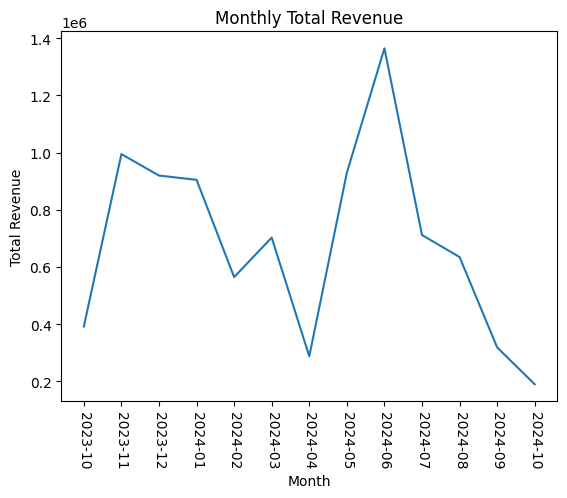

매출 Top 3 카테고리 Category
Food           1966000
Electronics    1746000
Beauty         1493000
Name: TotalRevenue, dtype: int64
매출 Top 5 국가 Country
미국      2238000
독일      1973000
중국      1766000
일본      1523000
대한민국    1419000
Name: TotalRevenue, dtype: int64


In [76]:
# 2-1
df['TotalRevenue'] = df['Quantity'] * df['Price']

# 2-2
df['Year'] = df['OrderDate'].dt.to_period('M')
monthly_rev = df.groupby('Year')['TotalRevenue'].sum().reset_index()
monthly_rev['Year'] = monthly_rev['Year'].astype(str)

plt.plot(monthly_rev['Year'], monthly_rev['TotalRevenue'])
plt.title('Monthly Total Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation = 270)

plt.show()

# 2-3
category_gp = df.groupby('Category')['TotalRevenue'].sum()
category_top = category_gp.sort_values(ascending=False).head(3)
print(f'매출 Top 3 카테고리 {category_top}')

# 2-4
country_gp = df.groupby('Country')['TotalRevenue'].sum()
country_top = country_gp.sort_values(ascending=False).head(5)
print(f'매출 Top 5 국가 {country_top}')

3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [ ]:
# 3-1
total_sales_custom = df.groupby('CustomerID')['TotalRevenue'].sum()
custom_sales_top = total_sales_custom.sort_values(ascending=False).head(5)
print(f'매출액 Top 5 고객 {custom_sales_top}')

# 3-2
custom_order_count = df.groupby('CustomerID')['OrderID'].count()
custom_order_top = custom_order_count.sort_values(ascending=False).head(5)
print(f'주문횟수 Top 5 고객 {custom_order_top}')

# 3-3
df['BirthYear'] = pd.to_datetime(df['Birthdate']).dt.year # 1963 ~ 2004

def age(birth_year):
    if birth_year > 1996:
        return '20대'
    elif birth_year > 1986:
        return '30대'
    elif birth_year > 1976:
        return '40대'
    elif birth_year > 1966:
        return '50대'
    else:
        return '60대 이상'

df['Age'] = df['BirthYear'].apply(age)

age_order_count = df.groupby(['Age', 'Category'])['OrderID'].count()
category_top = age_order_count.sort_values(ascending=False)
category_top_age = category_top.drop_duplicates('Age').reset_index(drop=True)

매출액 Top 5 고객 CustomerID
1007    334000
1354    245000
1141    241000
1589    215000
1632    192000
Name: TotalRevenue, dtype: int64
주문횟수 Top 5 고객 CustomerID
1007    2
1038    2
1141    2
1278    2
1421    2
Name: OrderID, dtype: int64


Age     Category   
30대     Food           10
40대     Books           7
50대     Electronics     7
40대     Beauty          6
50대     Clothing        6
        Beauty          6
        Books           6
30대     Books           5
20대     Beauty          5
40대     Sports          5
30대     Sports          5
20대     Food            5
30대     Beauty          4
        Electronics     4
20대     Sports          4
40대     Food            4
30대     Clothing        4
20대     Electronics     3
60대 이상  Electronics     3
50대     Food            3
        Sports          3
20대     Clothing        2
        Books           2
40대     Clothing        2
        Electronics     2
60대 이상  Beauty          2
        Books           2
        Clothing        1
        Food            1
        Sports          1
Name: OrderID, dtype: int64

4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.